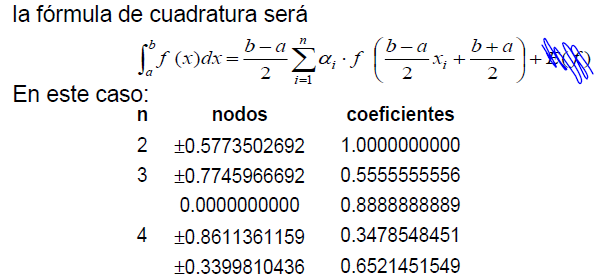

In [13]:
import numpy as np

def gauss_legendre(func, a, b, n):
    # Definir nodos y coeficientes según el valor de n
    if n == 2:
        x = np.array([-0.5773502692, 0.5773502692])
        c = np.array([1.0, 1.0])
    elif n == 3:
        x = np.array([-0.7745966692, 0.0, 0.7745966692])
        c = np.array([0.5555555556, 0.8888888889, 0.5555555556])
    elif n == 4:
        x = np.array([-0.8611363116, -0.3399810436, 0.3399810436, 0.8611363116])
        c = np.array([0.3478548451, 0.6521451549, 0.6521451549, 0.3478548451])
    else:
        raise ValueError("error")
    
    sum = 0
    for i in range(n):
        
        sum = sum + c[i] * func((b - a) / 2 * x[i] + (b + a) / 2)
        integral = (b - a)/2 * sum
        
    print("Resultado de la integral:", integral)

# Ejemplo de uso
def f(x):
    return 0.2 + 25*x - 200*x**2 + 675*x**3 - 900*x**4 + 400*x**5

gauss_legendre(f, 0, 0.8, 2)


Resultado de la integral: 1.8225777777644812


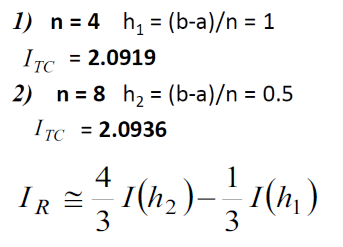

In [4]:
import numpy as np

def f(x):
    return np.exp(x)

def trapecio_compuesto(f, a, b, n):
    h = (b - a) / n
    sumatoria = 0.5 * (f(a) + f(b))
    for i in range(1, n):
        sumatoria += f(a + i * h)
    return h * sumatoria


def richardson_extrapolation(I_h1, I_h2):
    I_R = (4/3) * I_h2 - (1/3) * I_h1
    print('sol', I_R) 


I_h1 = trapecio_compuesto(f, 0, 1, 4)
I_h2 = trapecio_compuesto(f, 0, 1, 8)

richardson_extrapolation(I_h1, I_h2)




sol 1.7182841546998968


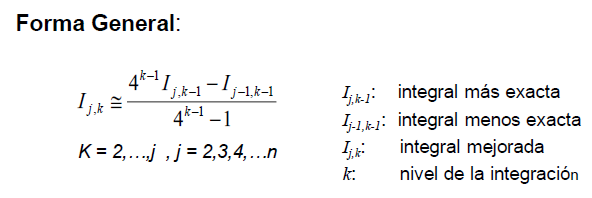

In [10]:
import numpy as np

def trapecio_inicial(f, a, b, n):
    R = np.zeros((n, n))
    
    # Calcular los valores iniciales de la primera columna (R[j, 0]) usando la regla del trapecio
    for j in range(n):
        h = (b - a) / (2**j)
        sumatoria = 0.5 * (f(a) + f(b))
        for i in range(1, 2**j):
            sumatoria += f(a + i*h)
        R[j, 0] = h * sumatoria
    
    return R

def romberg_integration(f, a, b, n):
    
    R = trapecio_inicial(f, a, b, n)
    
    for k in range(1, n):
        for j in range(k, n):
            R[j, k] = (4**k * R[j, k-1] - R[j-1, k-1]) / (4**k - 1)
    
    print(R)

# Ejemplo de uso
def f(x):
    return x**2

romberg_integration(f, 0, 1, 4)



[[0.5        0.         0.         0.        ]
 [0.375      0.33333333 0.         0.        ]
 [0.34375    0.33333333 0.33333333 0.        ]
 [0.3359375  0.33333333 0.33333333 0.33333333]]


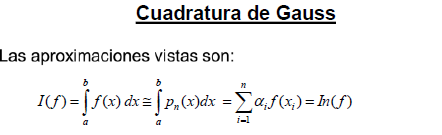

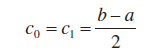

In [1]:
import numpy as np

def gauss_quadrature(func, a, b, x, c):

    integral = 0
    for i in range(len(x)):
        integral += c[i] * func((b - a) / 2 * x[i] + (b + a) / 2)
    integral *= (b - a) / 2
    return integral

# Ejemplo de uso
def f(x):
    return 0.2 + 25*x - 200*x**2 + 675*x**3 - 900*x**4 + 400*x**5

# Definir nodos y coeficientes (para 2 puntos)
x = np.array([-0.5773502692, 0.5773502692])
c = np.array([1.0, 1.0])

a = 0   # Límite inferior
b = 0.8 # Límite superior

resultado = gauss_quadrature(f, a, b, x, c)
print("Resultado de la integral:", resultado)


Resultado de la integral: 1.8225777777644812
